In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [2]:
#this function is from practice assignment 6
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

In [3]:
apps_data = pd.read_csv("google-play-store-apps/googleplaystore.csv")
#apps_data.loc[apps_data.App == "10 Best Foods for You"]
apps_data.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
apps_reviews= pd.read_csv("google-play-store-apps/googleplaystore_user_reviews.csv")


In [5]:
apps_reviews.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [6]:
# the number of missing values for the size is 1695 so we cant remove but we can replace ******************************
apps_data.Size.value_counts()

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
39k                      1
921k                     1
754k                     1
500k                     1
34k                      1
Name: Size, Length: 462, dtype: int64

In [7]:
apps_data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [8]:
#rating is the only numerical column in the data set either a number or nan other are categorical values 
apps_data[['Reviews', 'Rating']].corr()

,Rating
Rating,1.0


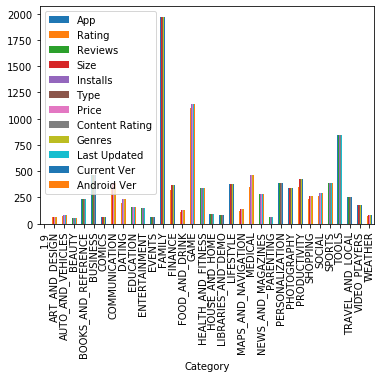

In [9]:
apps_data.groupby('Category').count().plot(kind='bar')
# this table shows that the data contains more rows about certain categories of applications 

In [10]:
apps_data.loc[apps_data.Category == "ART_AND_DESIGN"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7174,Easy DIY CD Craft Ideas,ART_AND_DESIGN,NaN,7,5.6M,"5,000+",Free,0,Everyone,Art & Design,"May 30, 2018",1.0,2.3 and up
8679,Dp for girls,ART_AND_DESIGN,4.2,175,8.2M,"50,000+",Free,0,Everyone,Art & Design,"May 26, 2017",1.2,4.0.3 and up
8712,Name Art DP - Focus n Filter Text 2018,ART_AND_DESIGN,4.3,132,7.7M,"10,000+",Free,0,Everyone,Art & Design,"January 4, 2018",1,4.1 and up
8871,Test Application DT 02,ART_AND_DESIGN,NaN,0,1.2M,0+,Free,0,Everyone,Art & Design,"March 14, 2017",4.0,4.2 and up


In [11]:
apps_data.loc[apps_data.Category == "FAMILY"].Rating.mean()

4.1922724670864335

In [12]:
apps_data.loc[apps_data.Category == "ART_AND_DESIGN"].Rating.mean()

4.358064516129032

In [13]:
#apps_data.boxplot(column='Size', by='Category', grid=True)

In [14]:
apps_data_missing = apps_data.isnull().sum()#**********************************************************************
apps_data_missing
# nans in rating are too much row 1474 9367

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# (1474/9367)*100 #this is 15% of data missing 
#If a value is missing becuase it doens't exist (like the height of the oldest child of someone
who doesn't have any children) then it doesn't make sense to try and guess what it might be.
These values you probably do want to keep as NaN. On the other hand, if a value is missing becuase it wasn't 
recorded, then you can try to guess what it might have been based on the other values in that column and row. 
(This is called "imputation" 

After investigating the data it seems that the Rating is(MCAR) missing completely at random which means that these values are probably missing because they were not recorded, rather than because they don't exist. So, it would make sense for us to try and guess what theyshould be rather than just leaving them as NA's.

On the other hand, there are other Size field that also have lot of missing fields.
In this case, though, the field is missing because the size varies with device. For this column, it would make more
sense to either leave it empty or to add a third value like "neither" and use that to replace the NA's.
the question here what is the appropriate value for the imputation.cluster according to the category and impute .

In [15]:
from sklearn.preprocessing import Imputer
#from sklearn.impute import SimpleImputer # pretty much the same thing, you can try yourself
mean_imputer = Imputer(missing_values=np.nan, strategy='mean')
#mean_simpleimputer = SimpleImputer(missing_values=np.nan, strategy='mean') # Same use for sklearn SimpleImputer
apps_data_missing

c:\users\ahmed\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [16]:
# Now let's impute missing values in Rating column with the mean
apps_data_copy=apps_data.copy()
mean_imputer.fit(apps_data_copy[["Rating"]])
apps_data_copy[["Rating"]]=mean_imputer.transform(apps_data_copy[["Rating"]]).ravel()
#imputed_subset_nfl_data = pd.DataFrame(mean_simpleimputer.fit_transform(subset_nfl_data), columns=subset_nfl_data.columns) # fitting and transforming can be done in one step

# Let's check the presence null values again to see if imputation worked for the column
apps_data_copy.isnull().sum()
# add you own counting of nulls for the dataframe imputed by SimpleImputer


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

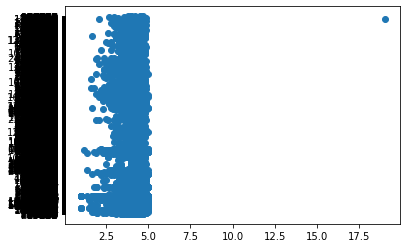

In [17]:
plt.scatter(apps_data_copy.Rating, apps_data_copy.Reviews)

# the scatter plot shows that there is no relation between the Rating of the application and the number of reviews for the same application 

In [18]:
sizeNew = [] # define array structure
for size in apps_data["Size"]:
    if(size[len(size)-1]=='M'):
        num=float(size[:len(size)-1])
        sizeNew.append(num*1000000)
    elif(size[len(size)-1]=='K'):
        num=float(size[:len(size)-1])
        sizeNew.append(num*1000)
    elif(size[len(size)-1]=='e'):
        sizeNew.append(0)
    else:
        sizeNew.append(0)
        

In [19]:
apps_data_copy["SizeNumerical"] = sizeNew
#del new_income_df["age"]

In [20]:
apps_data_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,SizeNumerical
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19000000.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14000000.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8700000.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25000000.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2800000.0


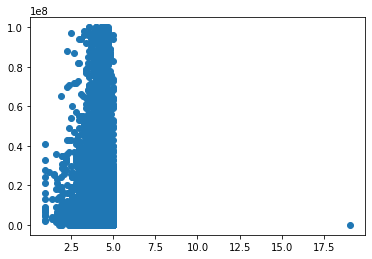

In [21]:
plt.scatter(apps_data_copy.Rating, apps_data_copy.SizeNumerical)

#it seems also that there is no correlation between the Rating to an application and the size of the application

In [23]:
#apps_data_copy.groupby('Rating').Reviews.sum().plot(kind='bar')

print(apps_data_copy.Reviews)


0           159
1           967
2         87510
3        215644
4           967
          ...  
10836        38
10837         4
10838         3
10839       114
10840    398307
Name: Reviews, Length: 10841, dtype: object
